Install Kaggle, load the dataset.
- Using Google Colab
- Using Kaggle prediction challenge dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This project's process would be as follow
1. Dataset prepartion (데이터셋 준비)
2. Feature Engineering (특징 엔지니어링)
3. EDA(Explloratory Data Analysis)
4. Selecting Model (모델선택)
5. Model Training (모델 학습)
6. Model Evaluation (모델 평가)

In [ ]:
!pip install kaggle

1. Dataset preparation

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download deepcontractor/car-price-prediction-challenge

In [ ]:
from zipfile import ZipFile
file_name = "/content/car-price-prediction-challenge.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./car_price_prediction.csv')
df.head() #data has been successfully loaded

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


2. Feature Engineering

In [ ]:
df.shape
#checking the data shape

(19237, 18)

In [ ]:
df.isnull().sum()
#checking missing values
#No missing value exist

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated values: {num_duplicates}")
#there are 313 duplicated values

Number of duplicated values: 313


In [ ]:
df[df.duplicated()]
#rows that have duplicated values

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [ ]:
df.dtypes
#data types for each columns
# we have two data types. int and object

,0
ID,int64
Price,int64
Levy,object
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,object


In [ ]:
df.nunique()
#checking the uniuqe values of each column
#I see we have duplicated car ID nums because the there are 19237 rows but only 18924 car IDs exist

,0
ID,18924
Price,2315
Levy,559
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,107


In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Insights
- ID seems not a useful column for predicting the price
- After doing some research, levy is related to tax. It should be numbers(int or float) not an object
- Cylinder could be int instead of float
- Engine volume should be float not object
- Mileage should be int not object
- Duplicated values should be dropped


In [ ]:
df.drop(['ID'], axis=1,inplace=True)#drop whole ID column 전체 ID 컬럼을 없애기 위해 axis 1
print(f'Columns after dropping ID : {df.shape[1]}')

Columns after dropping ID : 17


In [ ]:
print(f"unique values in Levy column : {df['Levy'].unique()}")
#It seems that we have - value in levy. It should be removed to change it to int type

unique values in Levy column : ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '39

In [ ]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Levy']
#replacing non-numeric values with NaN

,Levy
0,1399.0
1,1018.0
2,NaN
3,862.0
4,446.0
...,...
19232,NaN
19233,831.0
19234,836.0
19235,1288.0


In [ ]:
print(f"unique values in Cylinders column : {df['Cylinders'].unique()}")
#there is no non-numeric value or floating value. We

unique values in Cylinders column : [ 6.  4.  8.  1. 12.  3.  2. 16.  5.  7.  9. 10. 14.]


In [ ]:
df['Cylinders'] = df['Cylinders'].astype(int)
df['Cylinders']
#convert cylinder column from float to int

,Cylinders
0,6
1,6
2,4
3,4
4,4
...,...
19232,4
19233,4
19234,4
19235,4


In [ ]:
print(f"unique values in Engine volume column : {df['Engine volume'].unique()}")
# there are non numeric values such as 2.0 Turbo. we could replace it and change it to float

unique values in Engine volume column : ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3' '2.0 Turbo'
 '2.2 Turbo' '4.7' '1.5' '4.4' '3.0 Turbo' '1.4 Turbo' '3.6' '2.3'
 '1.5 Turbo' '1.6 Turbo' '2.2' '2.3 Turbo' '1.4' '5.5' '2.8 Turbo' '3.2'
 '3.8' '4.6' '1.2' '5' '1.7' '2.9' '0.5' '1.8 Turbo' '2.4 Turbo'
 '3.5 Turbo' '1.9' '2.7' '4.8' '5.3' '0.4' '2.8' '3.2 Turbo' '1.1' '2.1'
 '0.7' '5.4' '1.3 Turbo' '3.7' '1' '2.5 Turbo' '2.6' '1.9 Turbo'
 '4.4 Turbo' '4.7 Turbo' '0.8' '0.2 Turbo' '5.7' '4.8 Turbo' '4.6 Turbo'
 '6.7' '6.2' '1.2 Turbo' '3.4' '1.7 Turbo' '6.3 Turbo' '2.7 Turbo' '4.3'
 '4.2' '2.9 Turbo' '0' '4.0 Turbo' '20' '3.6 Turbo' '0.3' '3.7 Turbo'
 '5.9' '5.5 Turbo' '0.2' '2.1 Turbo' '5.6' '6' '0.7 Turbo' '0.6 Turbo'
 '6.8' '4.5' '0.6' '7.3' '0.1' '1.0 Turbo' '6.3' '4.5 Turbo' '0.8 Turbo'
 '4.2 Turbo' '3.1' '5.0 Turbo' '6.4' '3.9' '5.7 Turbo' '0.9' '0.4 Turbo'
 '5.4 Turbo' '0.3 Turbo' '5.2' '5.8' '1.1 Turbo']


In [ ]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')
df['Engine volume'] = df['Engine volume'].astype(float)
df['Engine volume']

,Engine volume
0,3.5
1,3.0
2,1.3
3,2.5
4,1.3
...,...
19232,2.0
19233,2.4
19234,2.0
19235,2.0


In [ ]:
print(f"unique values in Mileage column : {df['Mileage'].unique()}")

unique values in Mileage column : ['186005 km' '192000 km' '200000 km' ... '140607 km' '307325 km'
 '186923 km']


In [ ]:
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '')
df['Mileage']=df['Mileage'] .astype(int)
df['Mileage']

,Mileage
0,186005
1,192000
2,200000
3,168966
4,91901
...,...
19232,300000
19233,161600
19234,116365
19235,51258


In [ ]:
df.drop_duplicates(inplace=True)
print(f'Data after dropping duplicated values has {df.shape[0]} rows ')
# drop duplicated values (중복 값 제거)

Data after dropping duplicated values has 15725 rows 


In [ ]:
null_counts = df.isnull().sum() #알아서 각자 컬럼끼리 계산해준다.
print(null_counts)

Price                  0
Levy                5684
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64


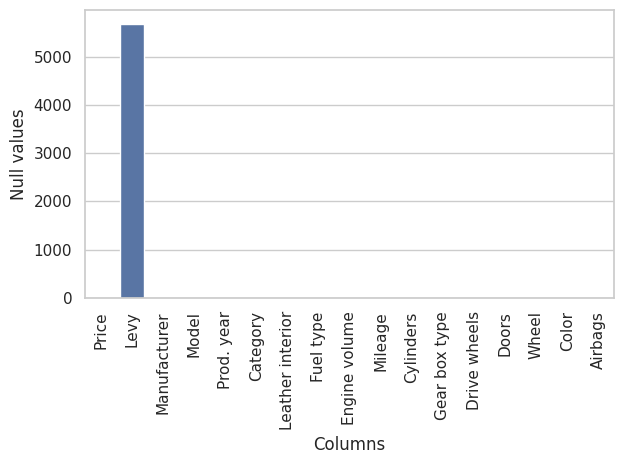

In [ ]:
sns.set_theme(style="whitegrid")

sns.barplot(x=null_counts.index, y=null_counts.values)

plt.xlabel("Columns")
plt.ylabel("Null values")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
#We could know that only Levy has null values.

In [ ]:
df['Levy'].fillna( df['Levy'].mean(), inplace=True)
df['Levy'] = df['Levy'].astype(int)
#replace null values in levy with the mean values and change the type into int

<ipython-input-104-311b2bdb077f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].fillna( df['Levy'].mean(), inplace=True)


In [ ]:
df.isnull().sum()
#df.isnull().sum().sum()을 통해 전체 null 개수도 한번에 알 수 있다.
#all null values are gone now

,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


In [ ]:
df.dtypes

,0
Price,int64
Levy,int64
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,float64
Mileage,int64


In [ ]:
df_nums=df[['Levy','Prod. year','Engine volume','Mileage','Cylinders','Airbags']]
df_nums

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,1399,2010,3.5,186005,6,12
1,1018,2011,3.0,192000,6,8
2,879,2006,1.3,200000,4,2
3,862,2011,2.5,168966,4,0
4,446,2014,1.3,91901,4,4
...,...,...,...,...,...,...
19230,645,2011,1.8,307325,4,12
19232,879,1999,2.0,300000,4,5
19233,831,2011,2.4,161600,4,8
19234,836,2010,2.0,116365,4,4


IQR 이상치 탐지 및 제거

Columns with outliers: ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders']


In [ ]:
#IQR 이용하여 이상치 탐지 및 제거 25퍼센트 지점~75퍼센트 지점
outlier_cols = []

for column in df_nums.columns:
    Q1 = df_nums.quantile(0.25)
    Q3 = df_nums.quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers on the transformed scale
    outliers = (df_nums < Q1 - 1.5 * IQR) | (df_nums > Q3 + 1.5 * IQR)
    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)


Columns with outliers: ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']


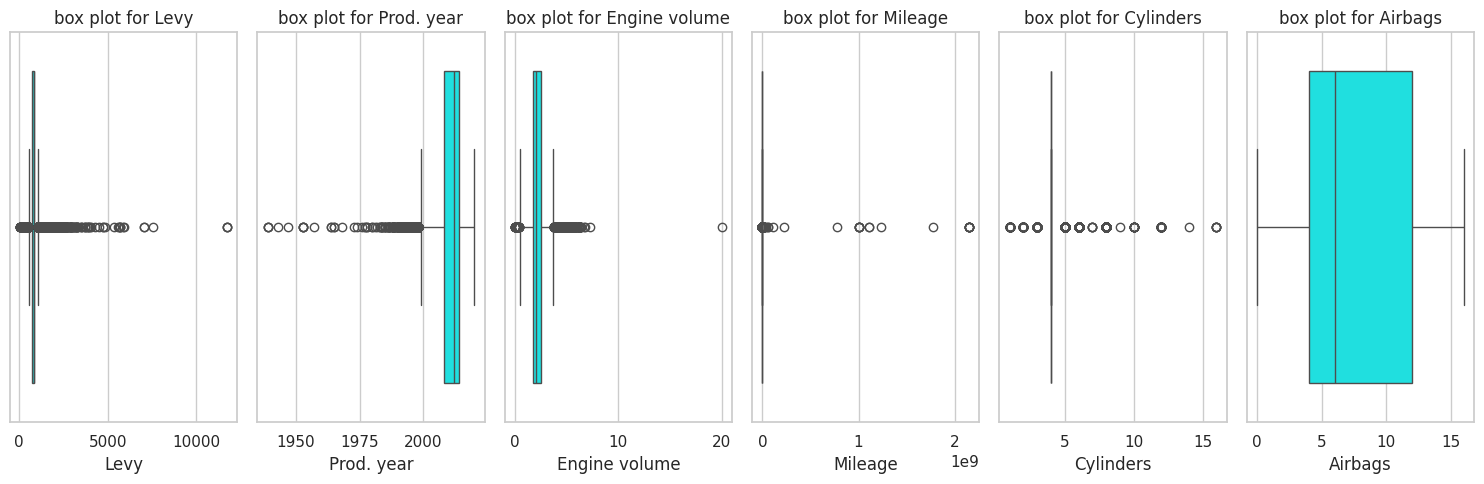

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_nums.columns), figsize=(15, 5))

# Create box plots for each column
for i, column in enumerate(df_nums.columns):
    sns.boxplot(x=df_nums[column], ax=axes[i], color='cyan')
    axes[i].set_title(f'box plot for {column}')

plt.tight_layout()
plt.show()
#수염 밖에(최솟값, 최댓값) 있는 이상치들을 boxplot을 사용하여 손쉽게 확인 가능

In [ ]:
df['Levy'].max()
df['Levy'].min()

87